In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
from torchsummary import summary
from torchvision import datasets, transforms

SIMPLE CNN FOR IMAGE CLASSIFICATION

LeNET 5 Architecture 

In [ ]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5,self).__init__()
        
        self.conv1 = nn.Conv2d(1,6,kernel_size = 5)
        self.pool = nn.AvgPool2d(kernel_size = 2, stride = 2)
        self.conv2 = nn.Conv2d(6,16,kernel_size = 5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self,x):
        x = self.pool(torch.sigmoid(self.conv1(x))) #convolution+activation+pooling
        x = self.pool(torch.sigmoid(self.conv2(x)))

        x = x.view(-1,16*5*5) #flattening

        x = torch.sigmoid(self.fc1(x)) #can use F.tanh or F.relu instead of torch.sigmoid
        x = torch.sigmoid(self.fc2(x))

        x = self.fc3(x)

        return x

In [3]:
transform = transforms.Compose([transforms.Resize((32,32)), 
                                transforms.ToTensor(), 
                                transforms.Normalize((0.5,),(0.5,))])

In [ ]:
# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

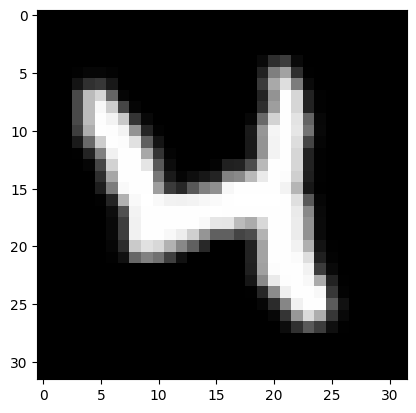

In [20]:
import matplotlib.pyplot as plt

# Get a sample from the train_dataset
image, label = train_dataset[20]  # Access the first image and label

# Convert the tensor image back to numpy for visualization (if transform is ToTensor)
image = image.squeeze()  # Remove channel dimension (1)

# Display the image
plt.imshow(image, cmap='gray')
plt.show()

In [13]:
# Initialize the LeNet-5 model, loss function, and optimizer
model = LeNet5()
criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [14]:
# Training function
def train(model, train_loader, criterion, optimizer, epochs=5):
    model.train()  # Set the model to training mode
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()  # Zero gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights
            
            running_loss += loss.item()
        
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}')

In [15]:
# Evaluation function
def evaluate(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # No need to track gradients for evaluation
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)  # Get the predicted class
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f'Accuracy on test set: {accuracy:.2f}%')

In [16]:
# Train the model
train(model, train_loader, criterion, optimizer, epochs=5)

Epoch [1/5], Loss: 0.8938
Epoch [2/5], Loss: 0.1953
Epoch [3/5], Loss: 0.1273
Epoch [4/5], Loss: 0.0982
Epoch [5/5], Loss: 0.0794


In [ ]:
# Evaluate the model
evaluate(model, test_loader)

Accuracy on test set: 97.76%


earn More About Advanced CNN Architectures
Once you're comfortable with basic CNNs, you can explore more advanced models. These architectures are often used for more complex tasks like object detection or segmentation, which might be useful for your PCB reverse engineering project.

LeNet: This is one of the earliest CNN architectures. It's simple and works well for smaller datasets like MNIST.

After understanding basic CNNs, you can explore the LeNet model.
ResNet (Residual Networks): ResNet uses skip connections (residual connections) and is very effective for deeper networks.

ResNet PyTorch Tutorial
U-Net: If you're doing segmentation (e.g., detecting traces or specific components), U-Net is very effective. It's often used in medical image segmentation, but it can work well for PCB images.

U-Net for Segmentation
YOLO (You Only Look Once): For object detection, if you need to locate PCB components within an image, YOLO is a popular real-time object detection model.

YOLO with PyTorch